In [1]:
# import library
from IPython.display import clear_output
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# K_means with IRIS data

In [2]:
# read data
IRIS_data = pd.read_csv("D:\WorkTable\Artificial_Intelligence\Report02\IRIS.csv")
print(IRIS_data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
# cleaning data
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = IRIS_data.dropna(subset=feature)
data = IRIS_data[feature].copy()
print(data)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [4]:
# scale the data
data = ((data - data.min()) / (data.max() - data.min())) * \
    9 + 1    # (* 9 + 1): làm tròn dữ liệu và > 0
print(data)

     sepal_length  sepal_width  petal_length  petal_width
0            3.00        6.625      1.610169        1.375
1            2.50        4.750      1.610169        1.375
2            2.00        5.500      1.457627        1.375
3            1.75        5.125      1.762712        1.375
4            2.75        7.000      1.610169        1.375
..            ...          ...           ...          ...
145          7.00        4.750      7.406780        9.250
146          6.00        2.875      7.101695        7.750
147          6.50        4.750      7.406780        8.125
148          5.75        6.250      7.711864        9.250
149          5.00        4.750      7.254237        7.375

[150 rows x 4 columns]


In [5]:
# initialize random centroids

def randomCentroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = randomCentroids(data=data, k=5)
print(centroids)

                     0         1         2      3        4
sepal_length  2.250000  5.750000  6.250000   3.00  7.25000
sepal_width   9.250000  5.125000  5.875000   7.75  4.75000
petal_length  1.762712  2.067797  5.576271  10.00  6.79661
petal_width   1.375000  6.250000  5.875000   5.50  8.87500


In [6]:
# find label and clustering data

def getLabels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(
        ((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = getLabels(data=data, centroids=centroids)
print('\n')
print(labels.value_counts())



0    49
2    49
4    47
1     5
Name: count, dtype: int64


In [7]:
# update the centroids

def newCentroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

print(newCentroids(data=data, labels=labels, k=3))

                     0         1         2         4
sepal_length  2.643447  2.432000  5.093287  6.734279
sepal_width   6.278087  2.005668  3.842336  4.577121
petal_length  1.692029  3.567332  6.132581  7.957674
petal_width   1.489487  3.702825  5.700948  8.279254


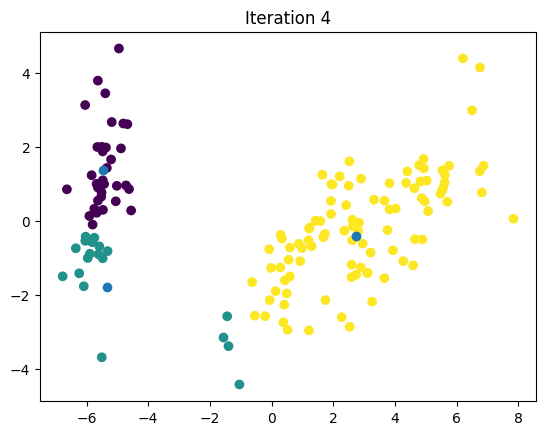

In [8]:
# plotting k_means iterations

def plotCluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

max_iterations = 100
k = 3
centroids = randomCentroids(data=data, k=k)
old_centroids = pd.DataFrame()
iteration = 1

while (iteration < max_iterations) and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = getLabels(data=data, centroids=centroids)
    centroids = newCentroids(data=data, labels=labels, k=k)
    plotCluster(data=data, labels=labels,
                centroids=centroids, iteration=iteration)
    iteration += 1

# K_means with WineQT data

In [23]:
# read data
WineQT_data = pd.read_csv("D:\WorkTable\Artificial_Intelligence\Report02\WineQT.csv")
print(WineQT_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [24]:
# scale the data
data = ((WineQT_data - WineQT_data.min()) / (WineQT_data.max() - WineQT_data.min())) * \
    9 + 1    # (* 9 + 1): làm tròn dữ liệu và > 0
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          3.230088          4.575342         1.00        1.616438   1.961603   
1          3.548673          5.684932         1.00        2.047945   2.292154   
2          3.548673          4.945205         1.36        1.863014   2.202003   
3          6.256637          1.986301         6.04        1.616438   1.946578   
4          3.230088          4.575342         1.00        1.616438   1.961603   
...             ...               ...          ...             ...        ...   
1138       2.353982          3.404110         2.17        1.863014   1.961603   
1139       2.752212          4.082192         1.72        1.616438   1.841402   
1140       2.274336          3.958904         1.72        1.678082   2.171953   
1141       2.035398          3.650685         1.90        1.801370   1.751252   
1142       2.035398          4.236301         2.08        1.678082   1.946578   

      free sulfur dioxide  

In [26]:
# initialize random centroids


def randomCentroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


centroids = randomCentroids(data=data, k=5)
print(centroids)

                             0         1         2         3         4
fixed acidity         4.265487  2.911504  4.584071  3.787611  3.389381
volatile acidity      4.513699  3.219178  1.863014  3.958904  2.849315
citric acid           5.950000  2.260000  4.690000  4.780000  1.720000
residual sugar        2.047945  2.047945  1.678082  1.678082  3.404110
chlorides             1.826377  2.021703  2.081803  4.215359  2.096828
free sulfur dioxide   2.477612  4.223881  1.671642  3.014925  2.343284
total sulfur dioxide  2.494700  1.318021  2.303887  1.890459  1.572438
density               4.482379  5.711454  4.938326  5.711454  6.372247
pH                    3.834646  6.881890  3.125984  4.401575  3.905512
sulphates             2.778443  2.562874  3.209581  1.862275  4.017964
alcohol               1.000000  5.153846  5.984615  5.015385  6.123077
quality               6.400000  6.400000  6.400000  4.600000  6.400000
Id                    8.731997  3.851597  8.185348  2.442705  5.237946


In [27]:
# find label and clustering data


def getLabels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(
        ((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)


labels = getLabels(data=data, centroids=centroids)
print('\n')
print(labels.value_counts())



1    330
3    305
2    250
0    150
4    108
dtype: int64


In [28]:
# update the centroids


def newCentroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


print(newCentroids(data=data, labels=labels, k=3))

                             0         1         2         3         4
fixed acidity         3.522172  3.013614  3.812130  4.685012  3.880326
volatile acidity      3.954051  3.750121  2.614615  3.361336  3.458593
citric acid           2.819300  1.801819  3.943742  4.204653  2.332950
residual sugar        1.840321  1.839273  1.847827  1.947532  2.268835
chlorides             2.176533  1.984889  1.917199  2.227162  2.062475
free sulfur dioxide   3.162786  3.096853  2.363565  2.571589  2.123747
total sulfur dioxide  2.417632  2.146284  1.719647  2.308238  1.748501
density               5.331301  4.965558  4.444439  6.158014  5.542955
pH                    4.641215  5.910913  4.741591  4.303995  4.814310
sulphates             2.384744  2.525975  2.821316  2.698740  2.897979
alcohol               2.631632  3.592478  4.999670  2.940774  4.114913
quality               4.904702  5.616642  6.631478  5.037825  5.930368
Id                    8.308265  4.112407  7.502525  2.799729  5.623882


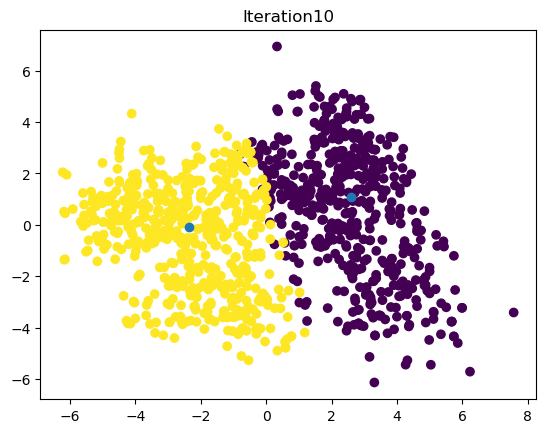

In [29]:
# plotting k_means iterations


def plotCluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()


max_iterations = 100
k = 2
centroids = randomCentroids(data=data, k=k)
old_centroids = pd.DataFrame()
iteration = 1

while (iteration < max_iterations) and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = getLabels(data=data, centroids=centroids)
    centroids = newCentroids(data=data, labels=labels, k=k)
    plotCluster(data=data, labels=labels,
                centroids=centroids, iteration=iteration)
    iteration += 1

# K_means with App data

In [3]:
import codecs

In [9]:
with codecs.open('D:\WorkTable\Artificial_Intelligence\Report02\App.csv', 'r', encoding='ISO-8859-1') as f:
    app_data = pd.read_csv(f)
print(app_data)

                                                     App  Rating Reviews  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1     159   
1                                    Coloring book moana     3.9     967   
2      U Launcher Lite ï¿½ï¿½ï¿½ FREE Live Cool Theme...     4.7   87510   
3                                  Sketch - Draw & Paint     4.5  215644   
4                  Pixel Draw - Number Art Coloring Book     4.3     967   
...                                                  ...     ...     ...   
10836                                   Sya9a Maroc - FR     4.5      38   
10837                   Fr. Mike Schmitz Audio Teachings     5.0       4   
10838                             Parkinson Exercices FR     NaN       3   
10839                      The SCP Foundation DB fr nn5n     4.5     114   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  398307   

                     Size     Installs  
0                     19M      10,000+  
1    

In [11]:
# cleaning data
feature = ['Rating','Reviews','Size','Installs']
app = app_data.dropna(subset=feature)
data = app_data[feature].copy()
print(data)

       Rating Reviews                Size     Installs
0         4.1     159                 19M      10,000+
1         3.9     967                 14M     500,000+
2         4.7   87510                8.7M   5,000,000+
3         4.5  215644                 25M  50,000,000+
4         4.3     967                2.8M     100,000+
...       ...     ...                 ...          ...
10836     4.5      38                 53M       5,000+
10837     5.0       4                3.6M         100+
10838     NaN       3                9.5M       1,000+
10839     4.5     114  Varies with device       1,000+
10840     4.5  398307                 19M  10,000,000+

[10841 rows x 4 columns]


In [12]:
# scale the data
data = ((data - data.min()) / (data.max() - data.min())) * \
    9 + 1    # (* 9 + 1): làm tròn dữ liệu và > 0
print(data)

TypeError: unsupported operand type(s) for -: 'str' and 'str'